In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc,classification_report


%matplotlib inline
path = '../data/'

In [25]:
train_npz = np.load(os.path.join(path, 'processed', 'train_lbp.npz'),
                      allow_pickle=True)
val_npz = np.load(os.path.join(path, 'processed', 'val_lbp.npz'), allow_pickle=True)
X_train, Y_train = train_npz['X_train'], train_npz['Y_train']
X_val, Y_val = val_npz['X_val'], val_npz['Y_val']

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_val = le.fit_transform(Y_val)

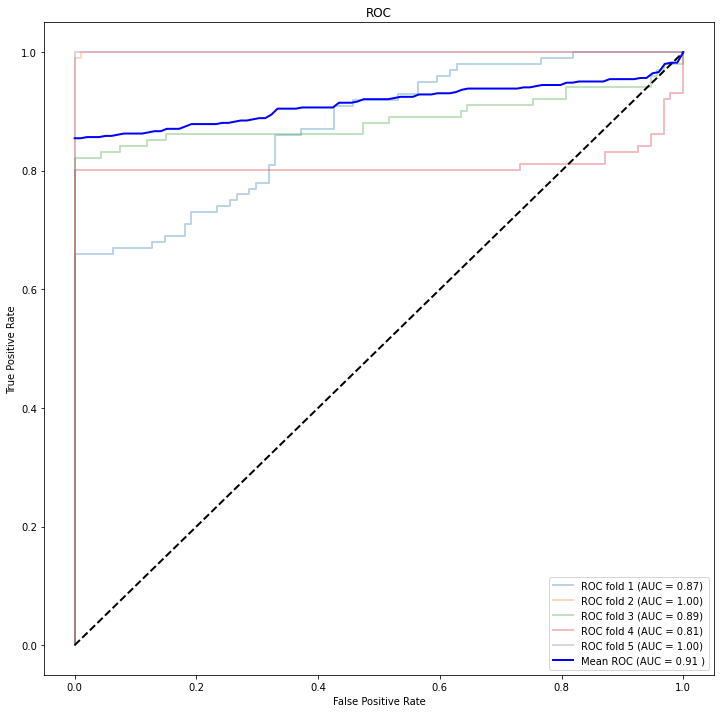

In [26]:
model = SVC(kernel='rbf', gamma=0.1, C=100, class_weight='balanced', probability=True)
strtfdKFold = StratifiedKFold(n_splits=5, shuffle=False)
kfold = strtfdKFold.split(X_train, Y_train)

crs = []
tprs = []
aucs = []
acc_score = []
mean_fpr = np.linspace(0, 1, 100)
index = 1

fig1 = plt.figure(figsize=[12, 12])

for train, test in kfold:
  model.fit(X_train[train],Y_train[train])
  y_pred = model.predict(X_train[test])
  prediction = model.predict_proba(X_train[test])
  crs.append(classification_report(Y_train[test], y_pred))
  fpr, tpr, t = roc_curve(Y_train[test], prediction[:, 1])
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  plt.plot(fpr,
           tpr,
           lw=2,
           alpha=0.3,
           label='ROC fold %d (AUC = %0.2f)' % (index, roc_auc))
  index += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,
         mean_tpr,
         color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),
         lw=2,
         alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [27]:
for i,cr in enumerate(crs):
  print(f'Fold: {i}')
  print(cr)

Fold: 0
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        94
           1       1.00      0.65      0.79       100

    accuracy                           0.82       194
   macro avg       0.86      0.82      0.82       194
weighted avg       0.87      0.82      0.81       194

Fold: 1
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        93
           1       0.94      1.00      0.97       101

    accuracy                           0.96       194
   macro avg       0.97      0.96      0.96       194
weighted avg       0.97      0.96      0.96       194

Fold: 2
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        93
           1       0.98      0.82      0.89       101

    accuracy                           0.90       194
   macro avg       0.91      0.90      0.90       194
weighted avg       0.91      0.90      0.90       

In [28]:
y_pred = model.predict(X_val)
print(classification_report(Y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       115
           1       0.97      0.85      0.91       125

    accuracy                           0.91       240
   macro avg       0.91      0.91      0.91       240
weighted avg       0.92      0.91      0.91       240

